# 1 -  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# 2 - Load the data and Preprocessing

In [2]:
df=pd.read_csv('Assessment Data2.csv')

creating timestamps for the data

In [3]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='mixed', errors='coerce')


In [4]:
df.dtypes

Order_ID              object
Order_Date    datetime64[ns]
Product_ID            object
Quantity               int64
dtype: object

In [5]:
df = df.sort_values(by='Order_Date')

In [6]:
df.shape

(3632365, 4)

In [7]:
df.head()

,Order_ID,Order_Date,Product_ID,Quantity
3595162,Order 1,2001-01-01 00:00:57,0794070,4
3595161,Order 1,2001-01-01 00:00:57,T87K1007,20
3595165,Order 2,2001-01-01 00:07:43,427-015,6
3595164,Order 2,2001-01-01 00:07:43,427-020,20
3595163,Order 2,2001-01-01 00:07:43,429-420,2


In [8]:
df = df.dropna(subset=['Order_Date'])


In [9]:
df.tail()

,Order_ID,Order_Date,Product_ID,Quantity
3595129,Order 1204955,2003-12-31 23:46:52,R7284U1004,2
3595134,Order 1204955,2003-12-31 23:46:52,PFQ806,2
3595136,Order 1204955,2003-12-31 23:46:52,0330029604,2
3595122,Order 1204956,2003-12-31 23:54:30,AT72D1188,2
3595121,Order 1204956,2003-12-31 23:54:30,T410B1004,14


creating line items based on instructions

In [10]:
def create_line_item_id(row):
  return f"{row['Order_ID']}_{row['Product_ID']}"


In [11]:
df['Line_Item_ID'] = df.apply(create_line_item_id, axis=1)

In [12]:
df.shape

(3626767, 5)

creating aggregation logic for handling other columns

In [13]:
grouped_df = df.groupby('Line_Item_ID').agg({
    'Order_ID': 'first',          
    'Order_Date': 'max',          
    'Product_ID': 'first',        
    'Quantity': 'sum'
}).reset_index()

In [14]:
grouped_df.shape

(3577560, 5)

visualizing the data set

In [15]:
grouped_df.head()

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
0,Order 1000000_0004650,Order 1000000,2003-09-14 17:05:06,0004650,2
1,Order 1000001_86627,Order 1000001,2003-09-14 17:05:39,86627,2
2,Order 1000002_632X263,Order 1000002,2003-09-14 17:05:41,632X263,50
3,Order 1000002_838-247C,Order 1000002,2003-09-14 17:05:41,838-247C,2
4,Order 1000002_882-020,Order 1000002,2003-09-14 17:05:41,882-020,2


In [16]:
grouped_df = grouped_df.sort_values(by='Order_Date')

In [17]:
grouped_df.head()

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
921258,Order 1_0794070,Order 1,2001-01-01 00:00:57,0794070,4
921259,Order 1_T87K1007,Order 1,2001-01-01 00:00:57,T87K1007,20
1258749,Order 2_427-015,Order 2,2001-01-01 00:07:43,427-015,6
1258750,Order 2_427-020,Order 2,2001-01-01 00:07:43,427-020,20
1258751,Order 2_429-420,Order 2,2001-01-01 00:07:43,429-420,2


In [18]:
new_df = grouped_df.reset_index()

In [19]:
new_df.dtypes

index                    int64
Line_Item_ID            object
Order_ID                object
Order_Date      datetime64[ns]
Product_ID              object
Quantity                 int64
dtype: object

In [20]:
new_df.drop(columns='index',inplace=True)
new_df.rename(columns={'level_0':'Index'},inplace=True)


In [21]:
new_df.head()

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
0,Order 1_0794070,Order 1,2001-01-01 00:00:57,0794070,4
1,Order 1_T87K1007,Order 1,2001-01-01 00:00:57,T87K1007,20
2,Order 2_427-015,Order 2,2001-01-01 00:07:43,427-015,6
3,Order 2_427-020,Order 2,2001-01-01 00:07:43,427-020,20
4,Order 2_429-420,Order 2,2001-01-01 00:07:43,429-420,2


In [22]:
new_df.tail()

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
3577555,Order 1204955_PFQ806,Order 1204955,2003-12-31 23:46:52,PFQ806,2
3577556,Order 1204955_R7284U1004,Order 1204955,2003-12-31 23:46:52,R7284U1004,2
3577557,Order 1204955_0330032806,Order 1204955,2003-12-31 23:46:52,0330032806,2
3577558,Order 1204956_AT72D1188,Order 1204956,2003-12-31 23:54:30,AT72D1188,2
3577559,Order 1204956_T410B1004,Order 1204956,2003-12-31 23:54:30,T410B1004,14


In [23]:
new_df['Product_ID'].value_counts()

Product_ID
Q4690512      14808
H000500LF     13120
Q4690756      11602
H000750LF     11360
HCRIMP05      10620
              ...  
9009127005        1
KT63ZZ118         1
4101-227          1
331H              1
5VX550            1
Name: count, Length: 63244, dtype: int64

there are 63244 different items sold

In [24]:
new_df.head()

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
0,Order 1_0794070,Order 1,2001-01-01 00:00:57,0794070,4
1,Order 1_T87K1007,Order 1,2001-01-01 00:00:57,T87K1007,20
2,Order 2_427-015,Order 2,2001-01-01 00:07:43,427-015,6
3,Order 2_427-020,Order 2,2001-01-01 00:07:43,427-020,20
4,Order 2_429-420,Order 2,2001-01-01 00:07:43,429-420,2


Checkin for outliers:

In [25]:
new_df['Quantity'].describe()

count    3.577560e+06
mean     1.853519e+01
std      1.111486e+02
min      2.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      8.000000e+04
Name: Quantity, dtype: float64

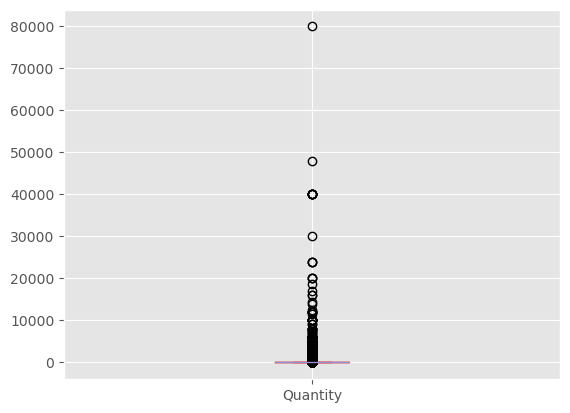

In [31]:
new_df['Quantity'].plot(kind='box')
plt.show()

Using IQR, we can see that std is very large, and altho mean and median are relatively close, max is 8000. so this suggest the occurence of outliers which could skew the data and we can confirm this using the box plot. 

In [32]:
from scipy import stats
outliers = new_df[np.abs(stats.zscore(new_df['Quantity'])) >= 3]

In [33]:
outliers

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity
541,Order 161_HCRIMP05,Order 161,2001-01-01 13:44:47,HCRIMP05,600
542,Order 161_HCRIMP07,Order 161,2001-01-01 13:44:47,HCRIMP07,400
911,Order 286_HCRIMP05,Order 286,2001-01-01 17:08:33,HCRIMP05,2000
1230,Order 404_WP7-08,Order 404,2001-01-01 20:20:27,WP7-08,800
1236,Order 404_WPT-08,Order 404,2001-01-01 20:20:27,WPT-08,400
...,...,...,...,...,...
3576666,Order 1204676_EPCR0012,Order 1204676,2003-12-31 17:10:42,EPCR0012,800
3576745,Order 1204697_Q4690512,Order 1204697,2003-12-31 17:26:50,Q4690512,400
3576840,Order 1204734_31272,Order 1204734,2003-12-31 17:57:16,31272,400
3576949,Order 1204773_Q4690512,Order 1204773,2003-12-31 18:46:18,Q4690512,400


As observed, our dataset contains **outliers** which represent large orders. Due to the valuable insights these data points provide, we must handle them carefully. Dropping these observations is not an option, so we will explore alternative methods:

**Transformation:** 
    
Applying a mathematical function, such as logarithmic transformation, to the 'quantity' column can help reduce the impact of outliers. This approach allows us to maintain the outliers in the dataset while mitigating their influence on the overall analysis.
    
**Outlier encoding:**

Creating a new column to flag outliers allows us to treat them as distinct entities during analysis. This method enables us to retain outliers and leverage the information they provide, which can be beneficial in certain machine learning algorithms or statistical models.

In [34]:
new_df['outlier_flag'] = (np.abs(stats.zscore(new_df['Quantity']))>= 3).astype(int)

In [35]:
new_df[new_df['outlier_flag']==1]

,Line_Item_ID,Order_ID,Order_Date,Product_ID,Quantity,outlier_flag
541,Order 161_HCRIMP05,Order 161,2001-01-01 13:44:47,HCRIMP05,600,1
542,Order 161_HCRIMP07,Order 161,2001-01-01 13:44:47,HCRIMP07,400,1
911,Order 286_HCRIMP05,Order 286,2001-01-01 17:08:33,HCRIMP05,2000,1
1230,Order 404_WP7-08,Order 404,2001-01-01 20:20:27,WP7-08,800,1
1236,Order 404_WPT-08,Order 404,2001-01-01 20:20:27,WPT-08,400,1
...,...,...,...,...,...,...
3576666,Order 1204676_EPCR0012,Order 1204676,2003-12-31 17:10:42,EPCR0012,800,1
3576745,Order 1204697_Q4690512,Order 1204697,2003-12-31 17:26:50,Q4690512,400,1
3576840,Order 1204734_31272,Order 1204734,2003-12-31 17:57:16,31272,400,1
3576949,Order 1204773_Q4690512,Order 1204773,2003-12-31 18:46:18,Q4690512,400,1


In [36]:
data=new_df.drop(columns=['Line_Item_ID','Order_ID'])

**Our objective is to project three key values:** 'item\_id', 'quantity', and the outlier flag, indicating whether an order is an outlier or not. For this purpose, we will utilize a multi-output regression model, which is suitable for handling multiple target variables.
To enhance the performance and efficiency of our regression model, we will employ label encoding to convert the categorical 'item\_id' into numerical values. Label encoding facilitates easier computation and improves the model's overall speed. We have utilized the LabelEncoder module to achieve this transformation.

With the categorical data encoded numerically and the target variables defined, we are now equipped to proceed with the multi-output regression analysis.

In [38]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [39]:
le = LabelEncoder()
data['Product_ID_encoded'] = le.fit_transform(data['Product_ID'])

In [40]:
data.set_index('Order_Date',inplace=True)
data.head()

,Product_ID,Quantity,outlier_flag,Product_ID_encoded
Order_Date,,,,
2001-01-01 00:00:57,0794070,4,0,2429
2001-01-01 00:00:57,T87K1007,20,0,58438
2001-01-01 00:07:43,427-015,6,0,18658
2001-01-01 00:07:43,427-020,20,0,18659
2001-01-01 00:07:43,429-420,2,0,18748


In [41]:
data_encoding=data[['Product_ID','Product_ID_encoded']].reset_index()
data_encoding.drop(columns='Order_Date',inplace=True)

In [42]:
data.drop(columns='Product_ID',inplace=True)
data.head()

,Quantity,outlier_flag,Product_ID_encoded
Order_Date,,,
2001-01-01 00:00:57,4,0,2429
2001-01-01 00:00:57,20,0,58438
2001-01-01 00:07:43,6,0,18658
2001-01-01 00:07:43,20,0,18659
2001-01-01 00:07:43,2,0,18748


In [43]:
data['Product_ID_encoded'].value_counts()

Product_ID_encoded
53632    14808
44918    13120
53634    11602
44922    11360
45456    10620
         ...  
32411        1
47723        1
17872        1
15198        1
25026        1
Name: count, Length: 63244, dtype: int64

we can see that each 63244 product_ids are now mapped to a unique integer 

In [44]:
data.dtypes

Quantity              int64
outlier_flag          int64
Product_ID_encoded    int64
dtype: object

# 3 - Feature engineering - feature extraction

In [45]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['day'] = df.index.day
    df['month'] = df.index.month
    df ['quarter'] = df.index.quarter
    df['year'] = df.index.year
    
    return df

data = create_features(data)

In [46]:
data.head()

,Quantity,outlier_flag,Product_ID_encoded,day,month,quarter,year
Order_Date,,,,,,,
2001-01-01 00:00:57,4,0,2429,1,1,1,2001
2001-01-01 00:00:57,20,0,58438,1,1,1,2001
2001-01-01 00:07:43,6,0,18658,1,1,1,2001
2001-01-01 00:07:43,20,0,18659,1,1,1,2001
2001-01-01 00:07:43,2,0,18748,1,1,1,2001


# 4 - Regression Model

creating Training and Target arrays to feed to the model

In [47]:
X=np.array((data['day'],data['month'],data['quarter'],data['year'])).T

In [49]:
X.shape

(3577560, 4)

In [48]:
y=np.array((data['Product_ID_encoded'],data['Quantity'],data['outlier_flag'])).T

In [50]:
y.shape

(3577560, 3)

### 4 - 1 - Train/Test Split

In [51]:
from sklearn.model_selection import train_test_split

# Define the test size, e.g., 20% of the data
test_size = 0.2

# Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


creating model instance and fitting

The Random Forest Regressor is a learning method that operates by constructing multiple decision trees at training time and outputting the mean of the classes (classification) or mean prediction of the individual trees (regression). This technique helps reduce overfitting and improve generalization capabilities, as it combines predictions from multiple models and can capture non-linear relationships between features and targets.

To build the model, I have initialized the RandomForestRegressor class and fitted the model. This trains the Random Forest Regressor model on your multi-output regression task, enabling it to learn the underlying patterns and relationships within the data.

In [60]:
from sklearn.ensemble import RandomForestRegressor
# Define parameters
#n_estimators = 350          # Increase the number of trees in the forest
#max_depth = 10            # Let the model decide the depth of the trees
#min_samples_split = 10      # Increase the minimum number of samples required to split an internal node
#min_samples_leaf = 2        # Increase the minimum number of samples required to be at a leaf node


# Initialize RandomForestRegressor with the defined parameters
rdregressor = RandomForestRegressor()

In [61]:
rdregressor.fit(X_train,y_train)


sample test data

In [53]:
test_data=[[ 3, 4,  1, 2001]]

make prediction on sample tes data

In [54]:
rdregressor.predict(test_data).astype(int)

array([[37076,    23,     0]])

Now that I trained the model, I will check the performance, lets import some metrics:

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict the target values for the test set
y_pred = rdregressor.predict(X_test)

for i in range(3):
    # Compute and print the evaluation metrics for each target variable
    print("Target variable", i+1)
    print("Mean Squared Error (MSE):", mean_squared_error(y_test[:, i], y_pred[:, i]))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test[:, i], y_pred[:, i]))
    print("R-squared (R²):", r2_score(y_test[:, i], y_pred[:, i]))
    print()

Target variable 1
Mean Squared Error (MSE): 339022970.48936784
Mean Absolute Error (MAE): 15929.512989119978
R-squared (R²): 0.01270042677057348

Target variable 2
Mean Squared Error (MSE): 9897.160338594005
Mean Absolute Error (MAE): 22.520867206160972
R-squared (R²): 0.0005980732014453372

Target variable 3
Mean Squared Error (MSE): 0.0053234260409585924
Mean Absolute Error (MAE): 0.010631564249676033
R-squared (R²): 0.00039701374752232343



Now that we've run the model on the test set and generated performance metrics, a few important points should be noted. Fine-tuning the model can be time-consuming, as it requires running the model multiple times with different hyperparameters to find the best possible outcome. Additionally, since we are projecting three variables based on only four features (which may not be entirely independent), the model might exhibit some weaknesses. In this case, it would be beneficial to utilize more advanced feature engineering techniques, such as grouping products, regions, and zones, to extract more meaningful information from the data.

Furthermore, it is essential to consider the trade-off between model complexity and performance. A more complex model might overfit the training data, resulting in poor generalization to unseen data. Regularization techniques, cross-validation, and pruning can help alleviate overfitting issues and improve model performance.

Lastly, exploring alternative models or ensemble methods could potentially yield better results. This could involve experimenting with various regression models, or utilizing techniques such as bootstrapping or bagging to combine the strengths of multiple models. The ultimate goal is to find the best model that can accurately predict the target variables without sacrificing generalization ability.


Defining a function to create a (near) empty data frame which will be filled with next years projcetions

In [44]:
def create_projection_df(year):
  days = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31")
  df = pd.DataFrame({'day': days.day,
                     'month': days.month,
                     'quarter': days.quarter,
                     'year': days.year})
  return df



In [45]:
# Create the projection DataFrame
projection_df = create_projection_df(2004)

In [46]:
projection_df.head()

,day,month,quarter,year
0,1,1,1,2004
1,2,1,1,2004
2,3,1,1,2004
3,4,1,1,2004
4,5,1,1,2004


Make prediction for the year 2004

In [47]:
# Make predictions
predictions = rdregressor.predict(projection_df[['day', 'month', 'quarter', 'year']]).astype(int)


reverting back the encoded product_id, and filling the dataframe

In [62]:
# Add predictions to the projection DataFrame
projection_df['Predicted_Quantity'] = predictions[:, 1].astype(int)
projection_df['Predicted_Product_ID'] = le.inverse_transform(predictions[:, 0].astype(int))
projection_df['Projected_outlier_flag'] = predictions[:, 2].astype(int)

In [63]:
projection_df.head()

,day,month,quarter,year,Predicted_Quantity,Predicted_Product_ID
0,1,1,1,2004,13,AFRB24-SR
1,2,1,1,2004,11,ARE37C3E-IAA-959
2,3,1,1,2004,11,A91286
3,4,1,1,2004,14,AM102C-1LF
4,5,1,1,2004,13,ARUF48D14
